In [539]:
#필요한 라이브러리 불러오기
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

In [540]:
#matplotlib 한글 폰트 오류 문제 해결
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font_name)

In [541]:
#데이터 불러오기
API = pd.read_csv('C:/Users/suin0/Programing/data/animal/유기동물API.csv', encoding='cp949')
household = pd.read_csv('C:/Users/suin0/Programing/data/animal/가구원수별_반려동물보유유형.csv', encoding='cp949')
a= pd.read_csv('C:/Users/suin0/Programing/data/animal/2022년반려동물등록현황.csv', encoding='cp949')

In [542]:
API.head()

,desertionNo,filename,happenDt,happenPlace,kindCd,colorCd,age,weight,noticeNo,noticeSdt,...,processState,sexCd,neuterYn,specialMark,careNm,careTel,careAddr,orgNm,chargeNm,officetel
0,4.485320e+14,http://www.animal.go.kr/files/shelter/2023/05/...,20230611,이동 649-7 앞 도로 부근,[개] 푸들,흰색,2015(년생),6(Kg),경남-창원3-2023-00211,20230611,...,종료(반환),M,Y,[Table],진해유기동물보호소,055-225-5701,경상남도 창원시 진해구 웅천로 218 (성내동) 도시농업과 부지 내,경상남도 창원시 진해구,창원진해구,055-225-5701
1,4.485280e+14,http://www.animal.go.kr/files/shelter/2023/05/...,20230611,양덕북9길13 엘렌시아아파트 주변,[개] 믹스견,검정+갈색,2023(60일미만)(년생),1(Kg),경남-창원2-2023-00187,20230611,...,보호중,M,N,[Table],마산유기동물보호소,055-225-5701,경상남도 창원시 마산합포구 진북면 지산2길 139-112 226-19,경상남도 창원시 마산합포회원구,창원시마산합포회원구,055-225-5701
2,4.475080e+14,http://www.animal.go.kr/files/shelter/2023/05/...,20230611,상림112 지구대,[개] 이탈리안 그레이 하운드,검은색,2017(년생),5.2(Kg),경북-구미-2023-00219,20230611,...,보호중,M,N,[Table],구미시 동물보호센터,054-471-5718,경상북도 구미시 해평면 낙동대로 2206,경상북도 구미시,백창훈,054-480-5844
3,4.464960e+14,http://www.animal.go.kr/files/shelter/2023/05/...,20230611,학교면 둔기길61-5,[개] 믹스견,바둑이,2022(년생),5.00(Kg),전남-함평-2023-00229,20230611,...,보호중,M,U,[Table],학교동물임시보호센터,010-5649-3435,전라남도 함평군 학교면 송산길 84 (학교면) 월산리 806-1,전라남도 함평군,함평군,061-320-1936
4,4.464960e+14,http://www.animal.go.kr/files/shelter/2023/05/...,20230611,학교면 둔기길 61-2,[개] 믹스견,갈색,2022(년생),6.00(Kg),전남-함평-2023-00228,20230611,...,보호중,F,U,[Table],학교동물임시보호센터,010-5649-3435,전라남도 함평군 학교면 송산길 84 (학교면) 월산리 806-1,전라남도 함평군,함평군,061-320-1936


In [543]:
household.head(10)

,행정구역별(시도),가구원수,가구-계,반려동물미보유가구-계,반려동물보유가구-계,단일-계,단일-개,단일-고양이,단일-기타,복합-계,복합-개+고양이,복합-개+기타,복합-고양이+기타,복합-개+고양이+기타
0,서울특별시,1인가구,1390701,1280487,110214,106726,66930,35213,4583,3488,3183,143,126,36
1,서울특별시,2인가구,1034001,897872,136129,131350,96888,30302,4160,4779,4341,238,147,53
2,서울특별시,3인가구,792462,666905,125557,120696,92134,22310,6252,4861,4342,292,129,98
3,서울특별시,4인가구,602994,503905,99089,94795,69639,17548,7608,4294,3712,356,142,84
4,서울특별시,5인가구,132533,110020,22513,21343,15668,3918,1757,1170,961,132,58,19
5,서울특별시,6인가구,24435,20533,3902,3726,2694,658,374,176,147,29,-,-
6,서울특별시,7인이상가구,5164,4455,709,648,466,116,66,61,54,-,-,7
7,부산광역시,1인가구,455207,416064,39143,37693,25656,10600,1437,1450,1361,57,22,10
8,부산광역시,2인가구,411486,356941,54545,52335,40230,10821,1284,2210,2011,151,39,9
9,부산광역시,3인가구,282295,234984,47311,45158,34006,9160,1992,2153,1957,115,60,21


In [544]:
a.head()

,시군명,읍면동명,등록동물수(마리),(등록주체)시군구등록,(등록주체)대행업체등록,(등록주체)기타,(RFID종류)내장형,(RFID종류)외장형,(RFID종류)인식표,등록품종수,등록소유자수,동물소유자당등록동물수,해당동의등록대행업체수,데이터기준일자
0,가평군,가평읍,1508,NaN,NaN,NaN,984.0,462.0,62.0,NaN,1011,NaN,1.0,2022-12-31
1,가평군,북면,455,NaN,NaN,NaN,288.0,134.0,33.0,NaN,278,NaN,0.0,2022-12-31
2,가평군,상면,778,NaN,NaN,NaN,489.0,239.0,50.0,NaN,465,NaN,0.0,2022-12-31
3,가평군,설악면,1589,NaN,NaN,NaN,746.0,774.0,69.0,NaN,907,NaN,1.0,2022-12-31
4,가평군,조종면,768,NaN,NaN,NaN,480.0,243.0,45.0,NaN,481,NaN,1.0,2022-12-31


<h1> 1. 데이터전처리</h1>

 <h3>API 데이터 전처리</h3>

In [545]:
# 필요한 열만 선택
API = API[['happenPlace', 'kindCd', 'age', 'weight', 'sexCd', 'neuterYn', 'careNm','orgNm']]
# 열 이름 변경
API.columns = ['발견장소', '품종', '나이', '무게', '성별', '중성화여부', '보호소명','관할기관지역']

In [546]:
API.head(10)

,발견장소,품종,나이,무게,성별,중성화여부,보호소명,관할기관지역
0,이동 649-7 앞 도로 부근,[개] 푸들,2015(년생),6(Kg),M,Y,진해유기동물보호소,경상남도 창원시 진해구
1,양덕북9길13 엘렌시아아파트 주변,[개] 믹스견,2023(60일미만)(년생),1(Kg),M,N,마산유기동물보호소,경상남도 창원시 마산합포회원구
2,상림112 지구대,[개] 이탈리안 그레이 하운드,2017(년생),5.2(Kg),M,N,구미시 동물보호센터,경상북도 구미시
3,학교면 둔기길61-5,[개] 믹스견,2022(년생),5.00(Kg),M,U,학교동물임시보호센터,전라남도 함평군
4,학교면 둔기길 61-2,[개] 믹스견,2022(년생),6.00(Kg),F,U,학교동물임시보호센터,전라남도 함평군
5,학교면 둔기길 61-2,[개] 믹스견,2022(년생),6.00(Kg),M,U,학교동물임시보호센터,전라남도 함평군
6,당진시 당진중앙1로 195,[개] 말티즈 믹스 추정,2013(년생),4.86(Kg),M,Y,당진시동물보호소,충청남도 당진시
7,심곡로 77번길 17,[고양이] 한국 고양이,2023(60일미만)(년생),0.4(Kg),F,N,가나동물병원,경기도 부천시
8,괴안동 179-20,[고양이] 러시안 블루,2015(년생),5(Kg),M,Y,24시아이동물메디컬,경기도 부천시
9,까치울역 3번출구 앞,[개] 믹스견,2017(년생),12(Kg),F,U,24시아이동물메디컬,경기도 부천시


<h3>반려동물 등록수 데이터 전처리</h3>

In [547]:
a = a[['시군명', '등록동물수(마리)', '등록소유자수', '동물소유자당등록동물수']].fillna(0)  #필요한열만 사용
a = a.groupby('시군명').sum().reset_index() # 시군명 중복행은 합쳐줌
a.head(10)

,시군명,등록동물수(마리),등록소유자수,동물소유자당등록동물수
0,가평군,6468,4024,0.00
1,고양시,161890,118512,82.32
2,과천시,2974,2325,13.29
3,광명시,20161,15698,10.64
4,광주시,30012,19940,34.47
5,구리시,12381,9279,9.61
6,군포시,16187,12775,12.00
7,김포시,7912,6388,19.56
8,남양주시,54580,39517,31.71
9,부천시,113892,86532,126.24


<h1>2. 분석</h1>

2-1) 전체 지역별 반려동물 가구수  
                   

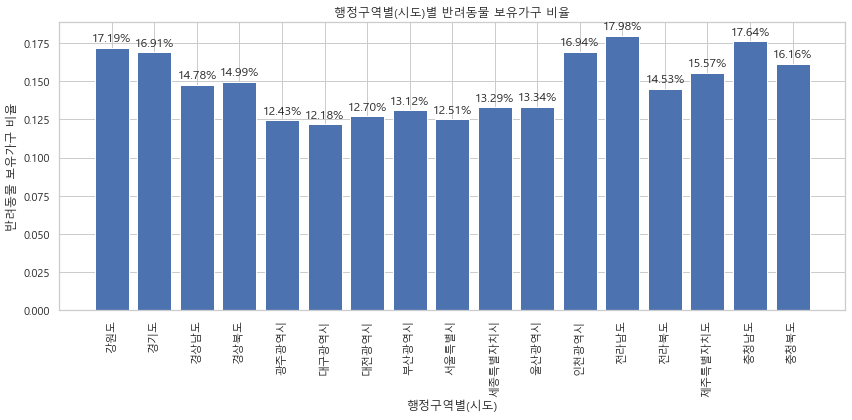

In [548]:
# 데이터 그룹화
행정구역별 = household.groupby('행정구역별(시도)').sum()
regions = 행정구역별.index
total_households = 행정구역별['가구-계']
pet_households = 행정구역별['반려동물보유가구-계']
ratio = pet_households / total_households

# 그래프 설정
x = np.arange(len(regions))

# 시각화
fig, ax = plt.subplots(figsize=(12, 6))
rects = ax.bar(x, ratio)

# 축과 레이블 설정
ax.set_ylabel('반려동물 보유가구 비율')
ax.set_xlabel('행정구역별(시도)')
ax.set_title('행정구역별(시도)별 반려동물 보유가구 비율')
ax.set_xticks(x)
ax.set_xticklabels(regions, rotation=90)

# 값 표시
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2%}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects)

plt.tight_layout()
plt.show()

#보유가구 수로 하면 인구가 많은지역이 당연히 많이 나오니 -> 각 행정구역별(시도)에서 가구-계 중 반려동물보유가구-계의 비율을 계산하여 막대 그래프로 표시 
#결과  : 전남, 충남, 제주가 반려동물을 많이 키우고있었고 // 광주,대구, 서울이 반려동물 보유가구가 적었다

2-2) 경기도별 반려동물가구 수

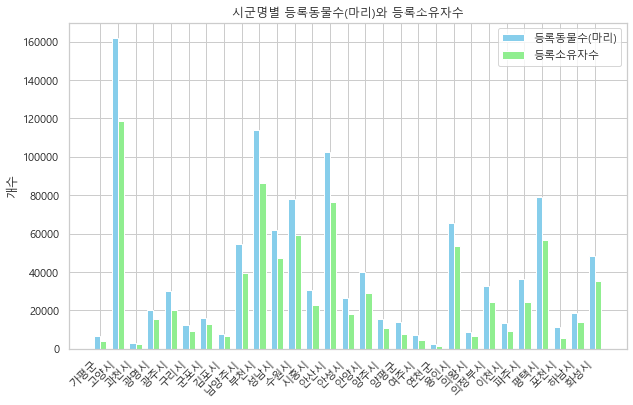

In [549]:
# 데이터
시군명 = a['시군명']
등록동물수 = a['등록동물수(마리)']
등록소유자수 = a['등록소유자수']

# 막대 그래프의 위치와 너비 설정
positions = np.arange(len(시군명))
width = 0.35

# 그림과 축 생성
fig, ax = plt.subplots(figsize=(10, 6))

# 막대 그래프 생성
bar1 = ax.bar(positions - width/2, 등록동물수, width, label='등록동물수(마리)', color='skyblue')
bar2 = ax.bar(positions + width/2, 등록소유자수, width, label='등록소유자수', color='lightgreen')

# x축 레이블 설정
ax.set_xticks(positions)
ax.set_xticklabels(시군명, rotation=45, ha='right')

# y축 레이블 설정
ax.set_ylabel('개수')

# 그래프 제목 설정
ax.set_title('시군명별 등록동물수(마리)와 등록소유자수')

# 범례 추가
ax.legend()

# 그래프 출력
plt.show()

2-3) 가구원수별 반려동물 보유 비율

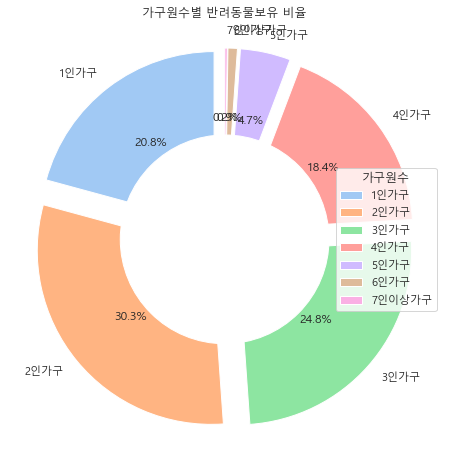

In [550]:
# 데이터 그룹화
가구원별 = household.groupby('가구원수').sum()
household_sizes = 가구원별.index
count = 가구원별['반려동물보유가구-계']

# 시각화 설정
plt.figure(figsize=(8, 8))
colors = sns.color_palette('pastel')[0:len(household_sizes)]
explode = [0.1] * len(household_sizes)  # 파이 조각이 튀어나올 크기

# 파이 차트 그리기
plt.pie(count, autopct='%1.1f%%', labels=household_sizes, startangle=90, colors=colors, explode=explode)

# 범례 추가
plt.legend(title='가구원수', loc='right')

# 차트 중심에 원 그리기 (도넛 차트 형태)
circle = plt.Circle((0, 0), 0.6, color='white')
plt.gca().add_artist(circle)

# 그래프 타이틀 설정
plt.title('가구원수별 반려동물보유 비율')

plt.show()

#2,3인가구가 반려동물 키우는 가구가 많았고, 가구원이 많은경우는 반려동물을 거의 키우지 않는다

2-4) 반려동물 소유 형태

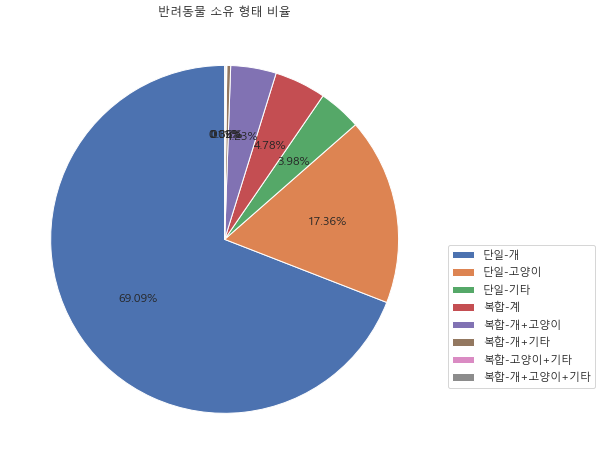

In [551]:
# 카테고리 열 선택
categories = ['단일-개', '단일-고양이', '단일-기타', '복합-계', '복합-개+고양이', '복합-개+기타', '복합-고양이+기타', '복합-개+고양이+기타']

# 숫자 형식으로 변환
household[categories] = household[categories].apply(pd.to_numeric, errors='coerce')

# 결측치 제거
household = household.dropna(subset=categories)

# 합계 계산
count = household[categories].sum()

# 파이차트 그리기
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(count, autopct='%1.2f%%', startangle=90)

# 그래프 타이틀 설정
plt.title('반려동물 소유 형태 비율')

# 범례 추가
plt.legend(wedges, categories, loc='upper left', bbox_to_anchor=(1, 0.5))

# 그래프 타이틀 설정
plt.title('반려동물 소유 형태 비율')

plt.show()

# 그냥 강아지만 키우는분들이 압도적으로 많았다.

2-4) 유기동물 발생지역

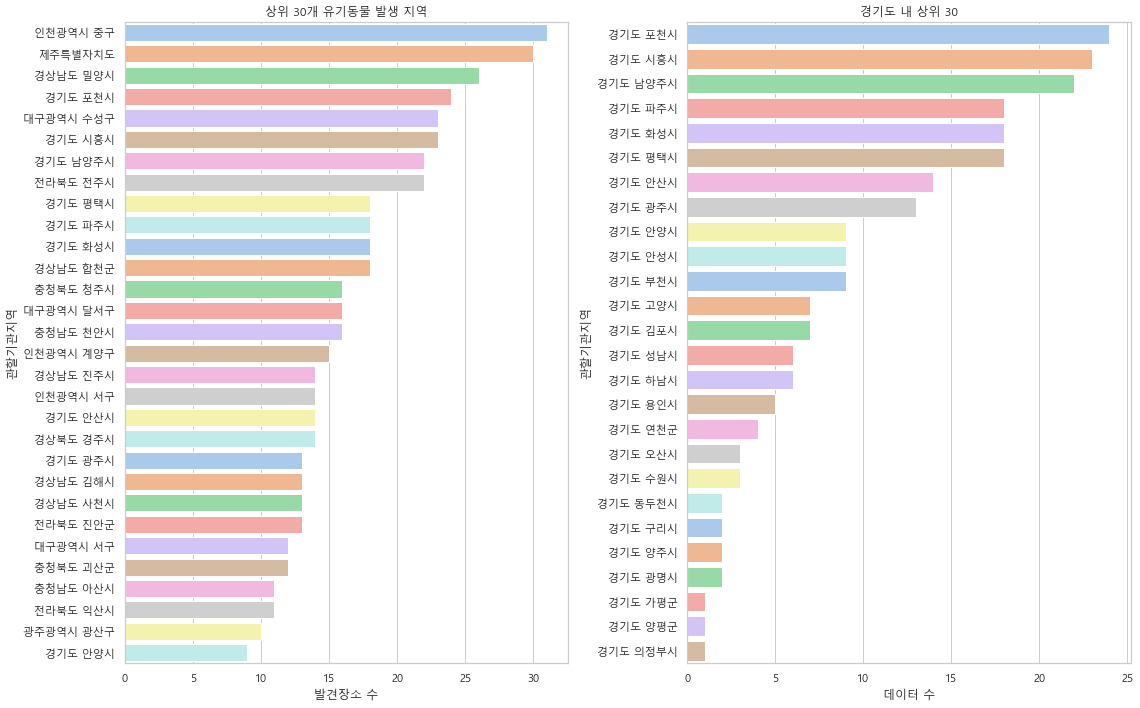

In [552]:
# 전체유기동물 발견장소 수 계산 및 막대 그래프 생성
전체유기동물 = API['관할기관지역'].value_counts().nlargest(30)

# 경기도 관할기관지역 필터링 및 막대 그래프 생성
filtered_data = API[API['관할기관지역'].str.contains(r'\b경기도\b')]
if filtered_data.empty:
    print("'경기도'에 해당하는 데이터가 없습니다.")
else:
    location_counts = filtered_data['관할기관지역'].value_counts().nlargest(30)

    # 그래프를 나란히 출력하기 위해 subplot 설정
    fig, axs = plt.subplots(1, 2, figsize=(16, 10))

    # 첫 번째 그래프: 전체유기동물 발견지역 상위 30위
    sns.barplot(x=전체유기동물.values, y=전체유기동물.index, palette='pastel', ax=axs[0])
    axs[0].set_xlabel('발견장소 수')
    axs[0].set_ylabel('관할기관지역')
    axs[0].set_title('상위 30개 유기동물 발생 지역')

    # 두 번째 그래프: 경기도 내 유기동물 발생지역 상위 30위
    sns.barplot(x=location_counts.values, y=location_counts.index, palette='pastel', ax=axs[1])
    axs[1].set_xlabel('데이터 수')
    axs[1].set_ylabel('관할기관지역')
    axs[1].set_title('경기도 내 상위 30')

    plt.tight_layout()
    plt.show()
    
    
# 전체 지역으로 봤을때는 인천, 제주, 경남이 제남순으로 제일 많이 발생했다
#경기도 한정으로 봤을때는 포천 시흥이 제일 유기동물이 많이 발생했고,양평 의정부가 제일 적제 발생했다

2-5) 유기된 동물 특징 상위 20알아보기

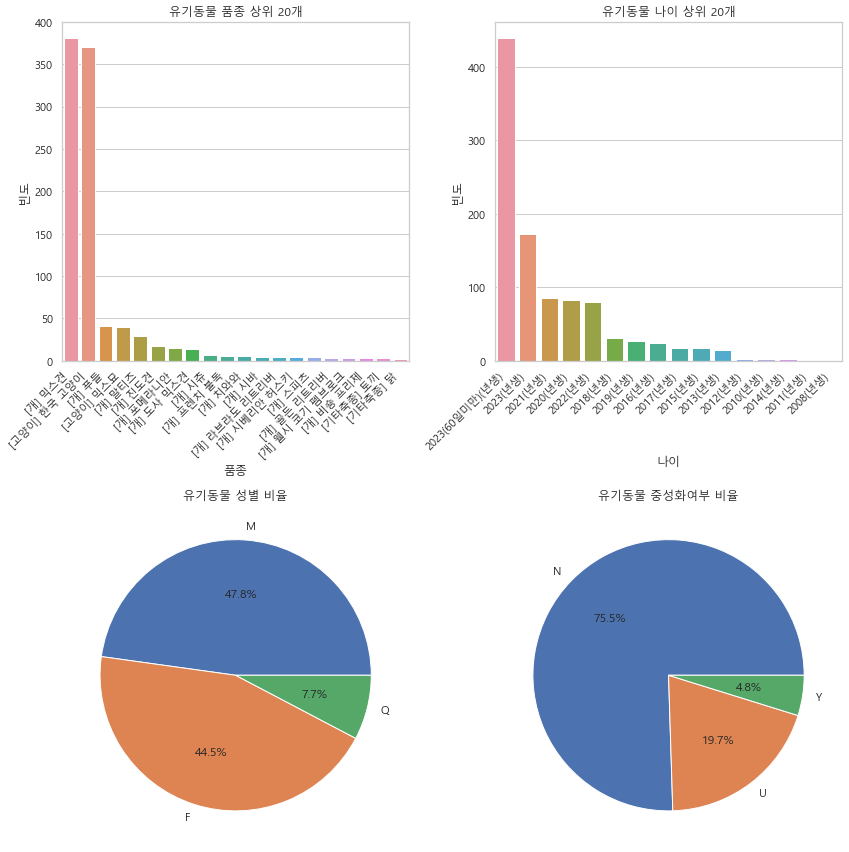

In [553]:
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# 품종 상위 20개를 시각화합니다.
top_breeds = API['품종'].value_counts().head(20)
sns.barplot(x=top_breeds.index, y=top_breeds.values, ax=axes[0, 0])
axes[0, 0].set_xlabel('품종')
axes[0, 0].set_ylabel('빈도')
axes[0, 0].set_title('유기동물 품종 상위 20개')
axes[0, 0].tick_params(axis='x', rotation=45)
plt.sca(axes[0, 0])
plt.xticks(rotation=45, ha='right')

# 나이 상위 20개를 시각화합니다.
top_ages = API['나이'].value_counts().head(20)
sns.barplot(x=top_ages.index, y=top_ages.values, ax=axes[0, 1])
axes[0, 1].set_xlabel('나이')
axes[0, 1].set_ylabel('빈도')
axes[0, 1].set_title('유기동물 나이 상위 20개')
axes[0, 1].tick_params(axis='x', rotation=45)
plt.sca(axes[0, 1])
plt.xticks(rotation=45, ha='right')

# 성별 비율을 파이 차트로 시각화합니다.
gender_counts = API['성별'].value_counts()
axes[1, 0].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
axes[1, 0].set_title('유기동물 성별 비율')

# 중성화여부 비율을 파이 차트로 시각화합니다.
neutered_counts = API['중성화여부'].value_counts()
axes[1, 1].pie(neutered_counts, labels=neutered_counts.index, autopct='%1.1f%%')
axes[1, 1].set_title('유기동물 중성화여부 비율')

plt.tight_layout()
plt.show()

# 유기동물 품좀 상위 20위를 알아보았다
# 거의 나이가 적은 아기동물들이 많이 유기가 됐다
#성별과 중성화 여부도 함께 알아보았다

In [560]:
import pandas as pd

# 데이터 그룹화
발견장소별 = API.groupby('발견장소').size().reset_index(name='발견횟수')

# 발견횟수를 기준으로 내림차순 정렬
발견장소별 = 발견장소별.sort_values(by='발견횟수', ascending=False)

# 상위 15개만 선택
top_15_발견장소 = 발견장소별.head(15)

# 데이터프레임 형태로 출력
df_top_15 = pd.DataFrame(top_15_발견장소, columns=[ '발견장소', '발견횟수'])
df_top_15.reset_index(drop=True, inplace=True)

df_top_15

,발견장소,발견횟수
0,내촌면 진목리 950,11
1,삼랑진,10
2,진접읍 양원자동차학원 부근,9
3,박달로 20번길 7-5,8
4,남북로128번길43,8
5,장연면 안보로 290,8
6,사천읍 신원아르시스 공터,7
7,진안군 주천면 삼거마을,6
8,새꽃로101 인근,6
9,광산구 동산동,6
